In [1]:
import uniport as up
import scanpy as sc
import pandas as pd

In [2]:
adata_cm = sc.read_h5ad('MERFISH/MERFISH_and_RNA.h5ad')
adata_merfish1 = adata_cm[adata_cm.obs['source']=='MERFISH'].copy()

In [3]:
labels_mouse2 = pd.read_csv('MERFISH/MERFISH_mouse2_cluster.txt', sep='\t')
celltype_mouse2 = labels_mouse2['cluster_main'].values

In [4]:
adata_merfish2 = up.load_file('MERFISH/MERFISH_mouse2.txt')

In [5]:
adata_merfish2.obs['cell_type'] = celltype_mouse2
adata_merfish2.obs['domain_id'] = -1
adata_merfish2.obs['domain_id'].astype('category')
adata_merfish2.obs['domain_id'] = adata_merfish2.obs['domain_id'].astype('category')
adata_merfish2.obs['source'] = 'MERFISH2'

In [6]:
adata_cm = adata_merfish2.concatenate(adata_merfish1, join='inner', batch_key='domain_id')
adata_merfish2 = adata_cm[adata_cm.obs['source']=='MERFISH2'].copy()

In [7]:
sc.pp.normalize_total(adata_merfish2)
sc.pp.log1p(adata_merfish2)
adata_merfish2 = up.batch_scale(adata_merfish2)

In [8]:
adata = up.Run(adata_cm=adata_merfish2, out='predict', pred_id=1)

Dataset 0: MERFISH2
AnnData object with n_obs × n_vars = 59651 × 153
    obs: 'cell_type', 'domain_id', 'source'
    var: 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable_nbatches-1', 'highly_variable_intersection-1'
    uns: 'log1p'
Reference dataset is dataset 0


Data with common HVG
AnnData object with n_obs × n_vars = 59651 × 153
    obs: 'cell_type', 'domain_id', 'source'
    var: 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable_nbatches-1', 'highly_variable_intersection-1'
    uns: 'log1p'




... storing 'cell_type' as categorical
... storing 'source' as categorical


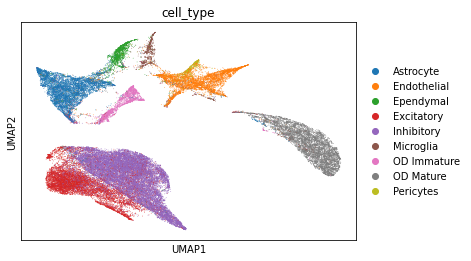

In [9]:
sc.pp.neighbors(adata, use_rep='predict')
sc.tl.umap(adata, min_dist=0.1)
sc.pl.umap(adata, color=['cell_type'])

In [10]:
print(adata.obsm['predict'].shape)

(59651, 2000)


In [ ]:
latent = adata.obsm['predict']
adata_rna = sc.read_h5ad('MERFISH/RNA.h5ad')
predict = pd.DataFrame(latent.T, index=adata_rna.var_names, columns=adata.obs_names)
predict.to_csv('MERFISH/Predict_mouse2_RNA.txt', sep='\t')